In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

df = pd.read_csv(url, sep = '\t')


In [2]:
# What is the number of observations in the dataset?
df.index.size

4622

In [3]:
# What is the number of columns in the dataset?
df.columns.size


5

In [4]:
# Which was the most-ordered item 
df['item_name'].describe().top


'Chicken Bowl'

In [5]:
# and how many times it was ordered?
df['item_name'].describe().freq

726

In [6]:
# How many different items are sold?
df['item_name'].unique().size

50

In [7]:
# How many items were orderd in total?
df['item_name'].size


4622

In [8]:
# Turn the item price into a float
df['item_price'] = df['item_price'].apply(lambda x: x.replace("$", ""))
df['item_price_float'] = df['item_price'].astype(float)
df.head()

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  \
0                                                NaN      2.39    
1                                       [Clementine]      3.39    
2                                            [Apple]      3.39    
3                                                NaN      2.39    
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...     16.98    

   item_price_float  
0              2.39  
1              3.39  
2              3.39  
3              2.39  
4             16.98

In [9]:
# What is the price of each item?
df[['item_name', 'item_price']].drop_duplicates()
df[['item_name', 'item_price']].drop_duplicates().reset_index()


index                              item_name item_price
0        0           Chips and Fresh Tomato Salsa      2.39 
1        1                                   Izze      3.39 
2        2                       Nantucket Nectar      3.39 
3        3  Chips and Tomatillo-Green Chili Salsa      2.39 
4        4                           Chicken Bowl     16.98 
5        5                           Chicken Bowl     10.98 
6        6                          Side of Chips      1.69 
7        7                          Steak Burrito     11.75 
8        8                       Steak Soft Tacos      9.25 
9        9                          Steak Burrito      9.25 
10      10                    Chips and Guacamole      4.45 
11      11                   Chicken Crispy Tacos      8.75 
12      12                     Chicken Soft Tacos      8.75 
13      13                           Chicken Bowl     11.25 
14      16                        Chicken Burrito      8.49 
15      18                            Canned Soda      2.18 
16      19                           Chicken Bowl      8.75 
17      21                       Barbacoa Burrito      8.99 
18      23                        Chicken Burrito     10.98 
19      26                           Chicken Bowl      8.49 
20      27                       Carnitas Burrito      8.99 
21      28                            Canned Soda      1.09 
22      31                          Steak Burrito      8.99 
23      33                          Carnitas Bowl      8.99 
24      34                          Bottled Water      1.09 
25      38  Chips and Tomatillo Green Chili Salsa      2.95 
26      39                          Barbacoa Bowl     11.75 
27      40                                  Chips      2.15 
28      44                     Chicken Salad Bowl      8.75 
29      49                    Chips and Guacamole      3.99 
..     ...                                    ...        ...
179   3195                          Barbacoa Bowl      8.69 
180   3252                       Carnitas Burrito      8.69 
181   3276                       Barbacoa Burrito     11.48 
182   3294                          Bottled Water      4.50 
183   3334                             Steak Bowl     26.07 
184   3354                             Steak Bowl     18.50 
185   3375                        Chicken Burrito     16.98 
186   3389                      6 Pack Soft Drink     12.98 
187   3480                          Carnitas Bowl     35.25 
188   3502                            Steak Salad      8.69 
189   3598           Chips and Fresh Tomato Salsa     44.25 
190   3599                          Bottled Water     10.50 
191   3601                         Veggie Burrito     33.75 
192   3634                        Chicken Burrito     26.25 
193   3658                     Chicken Soft Tacos     21.96 
194   3750                         Carnitas Salad      8.99 
195   3823                        Chicken Burrito     16.38 
196   3887                          Side of Chips     13.52 
197   3889                      Veggie Soft Tacos     16.98 
198   3890                  Carnitas Crispy Tacos     17.98 
199   3891                   Chicken Crispy Tacos     16.98 
200   3973                      Canned Soft Drink      5.00 
201   3989                          Chicken Salad      8.19 
202   4152                          Bottled Water     15.00 
203   4235                           Chicken Bowl      8.50 
204   4237                    Chips and Guacamole      8.50 
205   4354                       Steak Soft Tacos     18.50 
206   4489                    Chips and Guacamole     17.80 
207   4509                                  Chips      1.99 
208   4510                          Barbacoa Bowl     11.49 

[209 rows x 3 columns]

In [10]:
# How much was the revenue for the period in the dataset?
(df['item_price_float']*df['quantity']).sum()

39237.02

In [11]:
#  How many orders were made in the period?
df['order_id'].unique().size

1834

In [12]:
# What is the average revenue amount per order?
df.groupby('order_id').sum().mean()['item_price_float']

18.81142857142869

In [13]:
dfa = pd.DataFrame({"date": np.random.choice(pd.date_range(start="20170101", end="20170201"), size=1800),
                   "order_id": np.arange(1800)})

In [14]:
#  Merge the table dfa that contains order date and order id with df
pd.merge(df, dfa, on = 'order_id')

order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
5            3         1                           Chicken Bowl   
6            3         1                          Side of Chips   
7            4         1                          Steak Burrito   
8            4         1                       Steak Soft Tacos   
9            5         1                          Steak Burrito   
10           5         1                    Chips and Guacamole   
11           6         1                   Chicken Crispy Tacos   
12           6         1                     Chicken Soft Tacos   
13           7         1                           Chicken Bowl   
14           7         1                    Chips and Guacamole   
15           8         1  Chips and Tomatillo-Green Chili Salsa   
16           8         1                        Chicken Burrito   
17           9         1                        Chicken Burrito   
18           9         2                            Canned Soda   
19          10         1                           Chicken Bowl   
20          10         1                    Chips and Guacamole   
21          11         1                       Barbacoa Burrito   
22          11         1                       Nantucket Nectar   
23          12         1                        Chicken Burrito   
24          12         1                                   Izze   
25          13         1           Chips and Fresh Tomato Salsa   
26          13         1                           Chicken Bowl   
27          14         1                       Carnitas Burrito   
28          14         1                            Canned Soda   
29          15         1                        Chicken Burrito   
...        ...       ...                                    ...   
4497      1788         1                                  Chips   
4498      1789         1                           Chicken Bowl   
4499      1789         2                      Canned Soft Drink   
4500      1789         1                          Carnitas Bowl   
4501      1790         1                      Canned Soft Drink   
4502      1790         1                     Chicken Soft Tacos   
4503      1790         1           Chips and Fresh Tomato Salsa   
4504      1791         1                          Carnitas Bowl   
4505      1791         1                                  Chips   
4506      1792         1                           Chicken Bowl   
4507      1792         1                          Bottled Water   
4508      1793         1                          Steak Burrito   
4509      1793         1                                  Chips   
4510      1793         1                          Barbacoa Bowl   
4511      1794         1                           Chicken Bowl   
4512      1794         1                    Chips and Guacamole   
4513      1794         1                      Canned Soft Drink   
4514      1795         1                     Chicken Soft Tacos   
4515      1795         1                    Chips and Guacamole   
4516      1795         1                      Canned Soft Drink   
4517      1796         1                          Bottled Water   
4518      1796         1                             Steak Bowl   
4519      1797         1                         Veggie Burrito   
4520      1797         1                     Chicken Salad Bowl   
4521      1798         1                        Chicken Burrito   
4522      1798         1                      6 Pack Soft Drink   
4523      1798         1                     Steak Crispy Tacos   
4524      1799         1                        Chick

In [17]:
#  and plot daily revenue
df["cost"] = df["quantity"] * df["item_price_flo"]
dfa["profit"] = df.groupby("order_id").sum()["cost"]
(dfa.groupby("date").sum()["profit"]).plot()

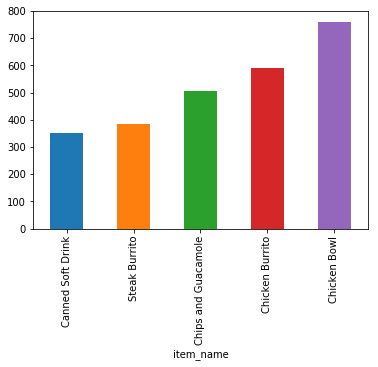

In [18]:
# Create a histogram of the top 5 items bought
df.groupby('item_name').sum().sort_values(by = 'quantity').tail(5)['quantity'].plot(kind = 'bar')

In [19]:
#  Sort the dataset by the name of the item
df.sort_values(by = 'item_name')

order_id  quantity          item_name  \
3389      1360         2  6 Pack Soft Drink   
341        148         1  6 Pack Soft Drink   
1849       749         1  6 Pack Soft Drink   
1860       754         1  6 Pack Soft Drink   
2713      1076         1  6 Pack Soft Drink   
3422      1373         1  6 Pack Soft Drink   
553        230         1  6 Pack Soft Drink   
1916       774         1  6 Pack Soft Drink   
1922       776         1  6 Pack Soft Drink   
1937       784         1  6 Pack Soft Drink   
3836      1537         1  6 Pack Soft Drink   
298        129         1  6 Pack Soft Drink   
1976       798         1  6 Pack Soft Drink   
1167       481         1  6 Pack Soft Drink   
3875      1554         1  6 Pack Soft Drink   
1124       465         1  6 Pack Soft Drink   
3886      1558         1  6 Pack Soft Drink   
2108       849         1  6 Pack Soft Drink   
3010      1196         1  6 Pack Soft Drink   
4535      1803         1  6 Pack Soft Drink   
4169      1664         1  6 Pack Soft Drink   
4174      1666         1  6 Pack Soft Drink   
4527      1800         1  6 Pack Soft Drink   
4522      1798         1  6 Pack Soft Drink   
3806      1525         1  6 Pack Soft Drink   
2389       949         1  6 Pack Soft Drink   
3132      1248         1  6 Pack Soft Drink   
3141      1253         1  6 Pack Soft Drink   
639        264         1  6 Pack Soft Drink   
1026       422         1  6 Pack Soft Drink   
...        ...       ...                ...   
2996      1192         1       Veggie Salad   
3163      1263         1       Veggie Salad   
4084      1635         1       Veggie Salad   
1694       686         1       Veggie Salad   
2756      1094         1       Veggie Salad   
4201      1677         1  Veggie Salad Bowl   
1884       760         1  Veggie Salad Bowl   
455        195         1  Veggie Salad Bowl   
3223      1289         1  Veggie Salad Bowl   
2223       896         1  Veggie Salad Bowl   
2269       913         1  Veggie Salad Bowl   
4541      1805         1  Veggie Salad Bowl   
3293      1321         1  Veggie Salad Bowl   
186         83         1  Veggie Salad Bowl   
960        394         1  Veggie Salad Bowl   
1316       536         1  Veggie Salad Bowl   
2156       869         1  Veggie Salad Bowl   
4261      1700         1  Veggie Salad Bowl   
295        128         1  Veggie Salad Bowl   
4573      1818         1  Veggie Salad Bowl   
2683      1066         1  Veggie Salad Bowl   
496        207         1  Veggie Salad Bowl   
4109      1646         1  Veggie Salad Bowl   
738        304         1  Veggie Soft Tacos   
3889      1559         2  Veggie Soft Tacos   
2384       948         1  Veggie Soft Tacos   
781        322         1  Veggie Soft Tacos   
2851      1132         1  Veggie Soft Tacos   
1699       688         1  Veggie Soft Tacos   
1395       567         1  Veggie Soft Tacos   

                                     choice_description item_price  \
3389                                        [Diet Coke]     12.98    
341                                         [Diet Coke]      6.49    
1849                                             [Coke]      6.49    
1860                                        [Diet Coke]      6.49    
2713                                             [Coke]      6.49    
3422                                             [Coke]      6.49    
553                                         [Diet Coke]      6.49    
1916                                        [Diet Coke]      6.49    
1922                                             [Coke]      6.49    
1937                                        [Diet Coke]      6.49    
3836                                             [Coke]      6.49    
298                                            [Sprite]      6.49    
1976                                        [Diet Coke]      6.49    
1167                                             [Coke]      6.49    
3875                                     

In [20]:
#  How many times were a Veggie Salad Bowl ordered?
df.loc[df['item_name'] == 'Veggie Salad Bowl']['item_name'].size

18

In [21]:
# How many times people orderd more than one Canned Soda?
df.loc[(df['item_name'] == 'Canned Soda') & (df['quantity'] > 1)]['item_name'].size

20

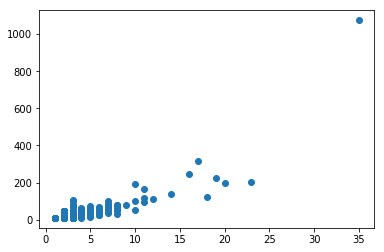

In [25]:
# Create a scatterplot with the number of items orderered per order price
df["revenue"] = df["item_price_float"]*df["quantity"]
plt.scatter(df.groupby("order_id").sum()["quantity"],df.groupby("order_id").sum()["revenue"])